In [69]:
! apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
default-jre is already the newest version (2:1.11-72build2).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.
openjdk version "11.0.21" 2023-10-17
OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)


In [70]:
! pip install h2o
! pip install yellowbrick
! pip install requests
! pip install tabulate
! pip install "colorama>=0.3.8"
! pip install future
! pip install shap

In [71]:
import h2o
from h2o.automl import H2OAutoML
import random
import os
import sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

sns.set(context="notebook", palette="Spectral", style='darkgrid', font_scale=1.5, color_codes=True)
warnings.filterwarnings('ignore')

import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Initialize H2O cluster
h2o.init()

# Now you can use H2O and other libraries in Google Colab environment


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 16 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 27 days
H2O_cluster_name:           H2O_from_python_unknownUser_ci791v
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [72]:
min_mem_size=6
run_time=222
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [73]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In Google Colab, you don't need to specify a port number for initializing H2O as the platform handles this automatically. Here's how you can adapt the provided code for Google Colab:

In [74]:
# Start H2O cluster
try:
    h2o.init(strict_version_check=False)
except Exception as e:
    logging.critical('Error initializing H2O: %s' % e)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 16 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 27 days
H2O_cluster_name:           H2O_from_python_unknownUser_ci791v
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Importing the Data and declaring variables for it : df = h2o and dff = dataset

In [75]:
import h2o
import pandas as pd

# Import data using H2O
df = h2o.import_file('Complete Pokedex V1.1.csv')

# Import data using pandas
dff = pd.read_csv('Complete Pokedex V1.1.csv')


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [76]:
dff.head()

pokedex_number   pokemon_name type_1  type_2  ability_1    ability_2  \
0               1      Bulbasaur  Grass  Poison   Overgrow  Chlorophyll   
1               2        Ivysaur  Grass  Poison   Overgrow  Chlorophyll   
2               3  Mega Venusaur  Grass  Poison  Thick Fat          NaN   
3               3       Venusaur  Grass  Poison   Overgrow  Chlorophyll   
4               3  Venusaur Gmax  Grass  Poison   Overgrow  Chlorophyll   

  ability_3  number_pokemon_with_typing primary_color      shape  ...  \
0       NaN                          15         Green  Quadruped  ...   
1       NaN                          15         Green  Quadruped  ...   
2       NaN                          15         Green  Quadruped  ...   
3       NaN                          15         Green  Quadruped  ...   
4       NaN                          15         Green  Quadruped  ...   

   against_ground  against_flying  against_psychic  against_bug  against_rock  \
0             1.0             2.0              2.0          1.0           1.0   
1             1.0             2.0              2.0          1.0           1.0   
2             1.0             2.0              2.0          1.0           1.0   
3             1.0             2.0              2.0          1.0           1.0   
4             1.0             2.0              2.0          1.0           1.0   

   against_ghost  against_dragon  against_dark  against_steel  against_fairy  
0            1.0             1.0           1.0            1.0            0.5  
1            1.0             1.0           1.0            1.0            0.5  
2            1.0             1.0           1.0            1.0            0.5  
3            1.0             1.0           1.0            1.0            0.5  
4            1.0             1.0           1.0            1.0            0.5  

[5 rows x 63 columns]

Studying the Data and Exploring Data.

In [77]:
dff.describe()

pokedex_number  number_pokemon_with_typing       height        weight  \
count     1118.000000                 1118.000000  1118.000000   1118.000000   
mean       446.923077                   22.432021     2.146154    381.106082   
std        270.915589                   22.900554     5.920150   1734.740865   
min          1.000000                    1.000000     0.100000      0.100000   
25%        207.250000                    5.000000     0.500000      8.825000   
50%        446.500000                   13.000000     1.000000     30.250000   
75%        694.750000                   34.000000     1.600000     80.000000   
max        898.000000                   72.000000   100.000000  10000.000000   

                bmi   hit_points       attack      defense  special_attack  \
count   1118.000000  1118.000000  1118.000000  1118.000000     1118.000000   
mean     132.926923    70.008050    80.696780    74.774597       73.249553   
std     2990.591902    26.656422    32.044483    30.946357       32.446932   
min        0.000000     1.000000     5.000000     5.000000       10.000000   
25%       18.000000    50.000000    55.250000    51.250000       50.000000   
50%       27.850000    68.000000    78.500000    70.000000       65.000000   
75%       41.700000    80.750000   100.000000    90.000000       95.000000   
max    99990.000000   255.000000   190.000000   250.000000      194.000000   

       special_defense  ...  against_ground  against_flying  against_psychic  \
count      1118.000000  ...     1118.000000     1118.000000      1118.000000   
mean         72.581395  ...        1.141324        1.154964         0.980098   
std          27.765163  ...        0.786124        0.592281         0.497864   
min          20.000000  ...        0.000000        0.250000         0.000000   
25%          50.000000  ...        1.000000        1.000000         1.000000   
50%          70.000000  ...        1.000000        1.000000         1.000000   
75%          90.000000  ...        2.000000        1.000000         1.000000   
max         250.000000  ...        4.000000        4.000000         4.000000   

       against_bug  against_rock  against_ghost  against_dragon  against_dark  \
count  1118.000000   1118.000000    1118.000000     1118.000000   1118.000000   
mean      0.989267      1.244633       1.024150        0.971377      1.067755   
std       0.605663      0.701525       0.566403        0.380929      0.465632   
min       0.250000      0.250000       0.000000        0.000000      0.250000   
25%       0.500000      1.000000       1.000000        1.000000      1.000000   
50%       1.000000      1.000000       1.000000        1.000000      1.000000   
75%       1.000000      2.000000       1.000000        1.000000      1.000000   
max       4.000000      4.000000       4.000000        2.000000      4.000000   

       against_steel  against_fairy  
count    1118.000000    1118.000000  
mean        0.995081       1.092129  
std         0.519945       0.540864  
min         0.250000       0.250000  
25%         0.500000       1.000000  
50%         1.000000       1.000000  
75%         1.000000       1.000000  
max         4.000000       4.000000  

[8 rows x 39 columns]

The above numbers make sense, we can take the feature height, the min is 0.1 and the mean is 2.146 and the max is 100. This is spreadout for the 1118 pokemons and we can plot an interactive map to understand the relation bit better.

Renaming the hitpoints to hp for ease of use.

In [78]:
# Rename column in H2O DataFrame
df = df.rename(columns={'hit_points': 'hp'})

# Rename column in pandas DataFrame
dff.rename(columns={'hit_points': 'hp'}, inplace=True)

# Print information about the modified pandas DataFrame
print(dff.columns)

# Print information about the modified H2O DataFrame
print(df.columns)

Index(['pokedex_number', 'pokemon_name', 'type_1', 'type_2', 'ability_1',
       'ability_2', 'ability_3', 'number_pokemon_with_typing', 'primary_color',
       'shape', 'height', 'weight', 'bmi', 'hp', 'attack', 'defense',
       'special_attack', 'special_defense', 'speed', 'total_stats', 'mean',
       'standard_deviation', 'capture_rate', 'generation', 'base_happiness',
       'base_experience', 'exp_type', 'exp_to_level_100', 'can_evolve',
       'evolves_from', 'final_evolution', 'mega_evolution', 'is_default',
       'baby_pokemon', 'alolan_form', 'galarian_form', 'forms_switchable',
       'legendary', 'mythical', 'genderless', 'female_rate', 'genus',
       'egg_group_1', 'egg_group_2', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fighting', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_

In [79]:
import pandas as pd
import plotly.express as px

fig = px.scatter(dff, x="attack", y="speed", color="type_1", hover_data=["pokemon_name"], title="Pokémon Attack vs Speed")
fig.show()


In [80]:
print(df.types)

{'pokedex_number': 'int', 'pokemon_name': 'string', 'type_1': 'enum', 'type_2': 'enum', 'ability_1': 'enum', 'ability_2': 'enum', 'ability_3': 'enum', 'number_pokemon_with_typing': 'int', 'primary_color': 'enum', 'shape': 'enum', 'height': 'real', 'weight': 'real', 'bmi': 'real', 'hp': 'int', 'attack': 'int', 'defense': 'int', 'special_attack': 'int', 'special_defense': 'int', 'speed': 'int', 'total_stats': 'int', 'mean': 'real', 'standard_deviation': 'real', 'capture_rate': 'int', 'generation': 'int', 'base_happiness': 'int', 'base_experience': 'int', 'exp_type': 'enum', 'exp_to_level_100': 'int', 'can_evolve': 'enum', 'evolves_from': 'enum', 'final_evolution': 'enum', 'mega_evolution': 'enum', 'is_default': 'enum', 'baby_pokemon': 'enum', 'alolan_form': 'enum', 'galarian_form': 'enum', 'forms_switchable': 'enum', 'legendary': 'enum', 'mythical': 'enum', 'genderless': 'enum', 'female_rate': 'real', 'genus': 'enum', 'egg_group_1': 'enum', 'egg_group_2': 'enum', 'egg_cycles': 'int', 'ag

In [81]:
df.shape

(1118, 63)

Feature Selection.

For feature Selection we have chosen Numerical columns that were relvevant to the speed and legendary model. The feature selection for those specific columns are explained and computed further ahead.

Here, we will drop some redundant columns and check which ones are required for our models.
We have decided to drop columns that are not directly relevant to the analysis and model construction, focusing primarily on attributes pertinent to our analysis of Pokémon speed and legendary prediction. The rationale behind dropping these columns is to streamline the dataset and improve the model's interpretability, predictive accuracy, and computational efficiency.

The dropped columns include:

'base_happiness', 'base_experience', 'exp_type', 'exp_to_level_100': These attributes are not directly associated with the speed characteristic or legendary prediction and are considered extraneous for our current analysis.

'can_evolve', 'evolves_from', 'final_evolution', 'is_default', 'genderless': These columns relate to Pokémon evolution and default status, which are not directly relevant to our analysis.

'egg_group_1', 'egg_group_2', 'egg_cycles': While important for breeding mechanics, these attributes are not central to our current focus.

'ability_1', 'ability_2', 'ability_3': Abilities are not directly associated with speed or legendary status and are therefore excluded.

'number_pokemon_with_typing' and 'against' attributes: While relevant for type effectiveness, they are not central to our current analysis.

'baby_pokemon', 'alolan_form', 'galarian_form', 'forms_switchable': These columns are miscellaneous attributes that do not contribute directly to our analysis objectives.

By dropping these columns, we aim to streamline the dataset, focusing solely on attributes crucial for our analysis while maintaining data integrity and relevance to the research objectives.

In [82]:
# Define the columns to drop
columns_to_drop = ['base_happiness', 'base_experience', 'exp_type', 'exp_to_level_100',
                   'can_evolve', 'evolves_from', 'final_evolution', 'is_default',
                   'genderless', 'egg_group_1', 'egg_group_2', 'egg_cycles','ability_1',
                   'ability_2', 'ability_3', 'number_pokemon_with_typing', 'against_normal',
                   'against_fire', 'against_water', 'against_electric', 'against_grass',
                   'against_ice', 'against_fighting', 'against_poison', 'against_ground',
                   'against_flying', 'against_psychic', 'against_bug', 'against_rock',
                   'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
                   'against_fairy', 'baby_pokemon', 'alolan_form', 'galarian_form',
                   'forms_switchable']

dfpd = dff.drop(columns=columns_to_drop)

We feature selected the dataframe from the past assignment and used it here. But since we are only focusing on 1 model, (Speed), we dont neeed most of these columns. We can start by removing

In [83]:
# Define the columns to drop
columns_to_drop = [ 'pokemon_name', 'primary_color', 'type_1', 'type_2', 'shape',
                   'capture_rate', 'female_rate', 'genus', 'mythical']

dfpd = dfpd.drop(columns=columns_to_drop)

In [84]:
print(dfpd.info())
print(dfpd.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pokedex_number      1118 non-null   int64  
 1   height              1118 non-null   float64
 2   weight              1118 non-null   float64
 3   bmi                 1118 non-null   float64
 4   hp                  1118 non-null   int64  
 5   attack              1118 non-null   int64  
 6   defense             1118 non-null   int64  
 7   special_attack      1118 non-null   int64  
 8   special_defense     1118 non-null   int64  
 9   speed               1118 non-null   int64  
 10  total_stats         1118 non-null   int64  
 11  mean                1118 non-null   float64
 12  standard_deviation  1118 non-null   float64
 13  generation          1118 non-null   int64  
 14  mega_evolution      1118 non-null   bool   
 15  legendary           1118 non-null   bool   
dtypes: boo

Importing the new feature selected dataframe into h2o aswell

In [85]:
import h2o
import pandas as pd

# Import data using H2O
dfpd_h2o = h2o.H2OFrame(dfpd)

# Import data using pandas
dfpd = pd.DataFrame(dfpd_h2o.as_data_frame())



Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [86]:
# Descriptive statistics
description = dfpd_h2o.describe()
print(description)

Rows:1118
Cols:16

pokedex_number      height              weight              bmi                 hp                 attack              defense             special_attack      special_defense    speed               total_stats         mean               standard_deviation    generation         mega_evolution    legendary
-------  ------------------  ------------------  ------------------  ------------------  -----------------  ------------------  ------------------  ------------------  -----------------  ------------------  ------------------  -----------------  --------------------  -----------------  ----------------  -----------
type     int                 real                real                real                int                int                 int                 int                 int                int                 int                 real               real                  int                enum              enum
mins     1.0                 0.1                 0.1                 0.0                 1.0                5.0                 5.0                 10.0                20.0               5.0                 175.0               29.17              0.0                   1.0
mean     446.9230769230766   2.146153846153848   381.10608228980345  132.92692307692312  70.00805008944548  80.69677996422188   74.77459749552771   73.24955277280853   72.58139534883732  69.47942754919508   440.78980322003514  73.46479427549211  20.065196779964225    4.650268336314845
maxs     898.0               100.0               10000.0             99990.0             255.0              190.0               250.0               194.0               250.0              200.0               1125.0              187.5              103.22                8.0
sigma    270.91558904444963  5.9201504419004864  1734.740864721238   2990.591902327437   26.65642213681824  32.044482964439496  30.946356662157825  32.446931740736154  27.76516326223819  30.036549308966922  120.0531798148955   20.00897746817681  10.675943820608797    2.315773424327012
zeros    0                   0                   0                   2                   0                  0                   0                   0                   0                  0                   0                   0                  19                    0
missing  0                   0                   0                   0                   0                  0                   0                   0                   0                  0                   0                   0                  0                     0                  0                 0
0        1.0                 0.7                 6.9                 14.1                45.0               49.0                49.0                65.0                65.0               45.0                318.0               53.0               8.64                  1.0                False             False
1        2.0                 1.0                 13.0                13.0                60.0               62.0                63.0                80.0                80.0               60.0                405.0               67.5               8.9                   1.0                False             False
2        3.0                 2.4                 155.5               27.0                80.0               100.0               123.0               122.0               120.0              80.0                625.0               104.17             18.75                 6.0                True              False
3        3.0                 2.0                 100.0               25.0                80.0               82.0                83.0                100.0               100.0              80.0                525.0               87.5               8.9                   1.0                False             False
4        3.0                 24.0                10000.0             17.4                80.0               82.0                83

None


Creating a 70 : 15 : 15 split. Train Val Test


In [87]:
import h2o

# Initialize H2O cluster
h2o.init()

# Define the percentages for train, validation, and test sets
pct_train = 0.70
pct_val = 0.15
pct_test = 0.15

# Split the data into train, validation, and test sets
dfpd_h2o_train, dfpd_h2o_val, dfpd_h2o_test = dfpd_h2o.split_frame(ratios=[pct_train, pct_val], seed=1234)

# Print the number of rows in each set
print("Training set:", dfpd_h2o_train)
print("Validation set:", dfpd_h2o_val)
print("Test set:", dfpd_h2o_test)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         1 min 20 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 27 days
H2O_cluster_name:           H2O_from_python_unknownUser_ci791v
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Training set:   pokedex_number    height    weight    bmi    hp    attack    defense    special_attack    special_defense    speed    total_stats    mean    standard_deviation    generation  mega_evolution    legendary
               2       1        13     13      60        62         63                80                 80       60            405   67.5                   8.9              1  False             False
               3       2.4     155.5   27      80       100        123               122                120       80            625  104.17                 18.75             6  True              False
               3      24     10000     17.4    80        82         83               100                100       80            525   87.5                   8.9              8  False             False
               4       0.6       8.5   23.6    39        52         43                60                 50       65            309   51.5                   9                1  F

In [88]:
print(dfpd_h2o_train.shape)
print(dfpd_h2o_test.shape)
print(dfpd_h2o_val.shape)

(795, 16)
(169, 16)
(154, 16)


Displaying all colummns in X

In [89]:
X = dfpd_h2o.col_names
print(X)

['pokedex_number', 'height', 'weight', 'bmi', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total_stats', 'mean', 'standard_deviation', 'generation', 'mega_evolution', 'legendary']


In [90]:
y_numeric = 'speed'
X = dfpd_h2o.col_names
X.remove(y_numeric)
print(X)


['pokedex_number', 'height', 'weight', 'bmi', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'total_stats', 'mean', 'standard_deviation', 'generation', 'mega_evolution', 'legendary']


H20 AutoML Execution

un AutoML. The max_runtime_secs argument provides a way to limit the AutoML run by time.

In [91]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [92]:
# Pass the data through H2OAutoML, including the validation_frame parameter
aml.train(x=X, y=y_numeric, training_frame=dfpd_h2o_train, validation_frame=dfpd_h2o_val)

AutoML progress: |
06:07:58.678: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_1_20240217_60758


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/30
# GBM base models (used / total)           1/14
# XGBoost base models (used / total)       2/9
# GLM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/4
# DRF base models (used / total)           0/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 9.249897862179557
RMSE: 3.041364473748511
MAE: 2.1533939888723124
RMSLE: 0.08213952080366146
Mean Residual Deviance: 9.249897862179557
R^2: 0.989636124281628
Null degrees of freedom: 794
Residual degrees of freedom: 789
Null deviance: 709548.1459119489
Residual deviance: 7353.668800432748
AIC: 4038.679212877215

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 13.818455229691768
RMSE: 3.7173182846901565
MAE: 2.431503281961601
RMSLE: 0.10892133680724331
Mean Residual Deviance: 13.818455229691768
R^2: 0.9859122165991941
Null degrees of freedom: 153
Residual degrees of freedom: 148
Null deviance: 151212.23211265373
Residual deviance: 2128.042105372532
AIC: 855.4378434955996

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 61.63188932453551
RMSE: 7.8505980233696535
MAE: 4.222220035991697
RMSLE: NaN
Mean Residual Deviance: 61.63188932453551
R^2: 0.930945697913097
Null degrees of freedom: 794
Residual degrees of freedom: 785
Null deviance: 712711.0591356652
Residual deviance: 48997.35201300573
AIC: 5554.449907035121

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
mae                     3.88594   1.55316    6.56562       3.73231       3.21512       2.58821       3.32843
mean_residual_deviance  46.8424   59.8849    153.675       26.4742       18.2191       14.4082       21.4356
mse                     46.8424   59.8849    153.675       26.4742       18.2191       14.4082       21.4356
null_deviance           142542    21978      172800        150977        123470        118782        146681
r2                      0.951414  0.0560763  0.85126       0.971402      0.977401      0.980053      0.976954
residual_deviance       7615.92   9945.97    25356.3       4315.3        2787.52       2276.5        3343.95
rmse                    6.04719   3.58363    12.3966       5.14531       4.26838       3.79582       4.62986
rmsle                   0.100369  0.0171049  nan           0.1171        0.0792464     0.110992      0.0941389

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

Interpreting the above results



In [93]:
print(aml.leaderboard)

model_id                                                    rmse       mse       mae       rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20240217_60758      7.8506    61.6319   4.22222  nan                          61.6319
StackedEnsemble_BestOfFamily_3_AutoML_1_20240217_60758   8.01467   64.2349   4.48879  nan                          64.2349
StackedEnsemble_AllModels_2_AutoML_1_20240217_60758      8.22882   67.7135   4.34126  nan                          67.7135
StackedEnsemble_BestOfFamily_4_AutoML_1_20240217_60758   8.36481   69.97     4.53493  nan                          69.97
GLM_1_AutoML_1_20240217_60758                            9.85015   97.0254   1.1257   nan                          97.0254
StackedEnsemble_AllModels_1_AutoML_1_20240217_60758     10.4482   109.166    5.18819  nan                         109.166
StackedEnsemble_BestOfFamily_2_AutoML_1_20240217_60758  10.4806   109.843    5.1801   nan                         109.843
StackedEnsemble_Best

In [94]:
# Initialize variables
model_index = 0
glm_index = 0
models_dict = {}

# Assuming aml is your AutoML object
aml_leaderboard_dfpd_h2o = aml.leaderboard.as_data_frame()

# Iterate through the leaderboard
for m in aml_leaderboard_dfpd_h2o['model_id']:
    # Assign index for StackedEnsemble models
    if 'StackedEnsemble' in m:
        models_dict[m] = model_index
        model_index += 1
    # Assign index for GLM model
    if 'GLM' in m:
        models_dict[m] = glm_index
        break

# Output the dictionary with model IDs and their assigned index
print(models_dict)

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
{'StackedEnsemble_AllModels_3_AutoML_1_20240217_60758': 0, 'StackedEnsemble_BestOfFamily_3_AutoML_1_20240217_60758': 1, 'StackedEnsemble_AllModels_2_AutoML_1_20240217_60758': 2, 'StackedEnsemble_BestOfFamily_4_AutoML_1_20240217_60758': 3, 'GLM_1_AutoML_1_20240217_60758': 0}


In [95]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

4


Analysing relation between all variables


We can check this by using various methods. Lets start with VIF first.

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Indicate which variables to compute VIF
# Use double square brackets to select multiple columns
Multic = dfpd[['hp', 'height', 'weight', 'bmi', 'attack', 'defense', 'mean', 'standard_deviation', 'special_attack', 'special_defense', 'total_stats']]

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]

# Display the VIF DataFrame
print(vif)


             variables           VIF
0                   hp  1.902553e+01
1               height  3.158121e+00
2               weight  2.795069e+00
3                  bmi  1.027789e+00
4               attack  3.298193e+01
5              defense  1.791939e+01
6                 mean  8.280993e+08
7   standard_deviation  6.126833e+00
8       special_attack  2.511067e+01
9      special_defense  2.795859e+01
10         total_stats  8.281075e+08


In [97]:
import statsmodels.formula.api as smf

# Define the formula with dependent and independent variables
formula = 'speed ~ height + weight + bmi + hp + attack + defense + mean + standard_deviation + special_attack + special_defense + total_stats'

# Fit the OLS model
results = smf.ols(formula, data=dfpd).fit()

# Display the summary of results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.682e+26
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:11:45   Log-Likelihood:                 25789.
No. Observations:                1118   AIC:                        -5.155e+04
Df Residuals:                    1106   BIC:                        -5.149e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.169e-13    2.8

something like this As seen from the OLS summary p-value for 'Address' and 'Date' is greater than 0.05. An extra variable 'Address' is unneccsary as 'Suburb','Postcode' and 'RegionName' will help us tell the location. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is 76.4%. Now will check VIF and p-values again for the selected independent variables.

We can check the importance of variables through this

Variable Importance:
total_stats: 1.0
mean: 0.9914024836318809
attack: 0.5238008131846734
special_attack: 0.5174975818755986
defense: 0.5118020092503873
hp: 0.46734831997882187
special_defense: 0.4631080297805584
legendary.True: 0.003424778371816979
legendary.False: 0.0034112131873699296
pokedex_number: 0.0020763546256895105
mega_evolution.False: 0.0019765574419844606
weight: 0.0017610400486823767
generation: 0.0015483277827909143
mega_evolution.True: 0.0015205525017232499
height: 0.0013999318964642165
standard_deviation: 0.0007107280942066717
bmi: 5.0593634585028576e-05


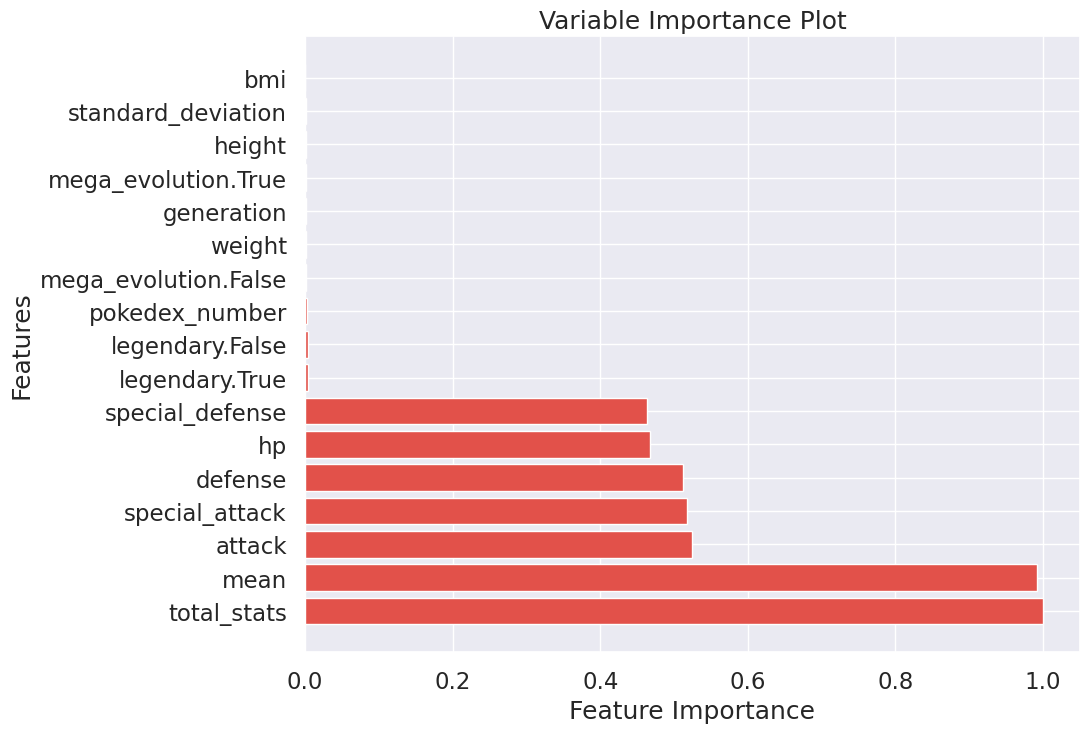

In [98]:
import matplotlib.pyplot as plt

# Assuming best_model1 is your trained model
feature_importance = best_model1.varimp()

# Extract feature names and importance values
feature_names = [row[0] for row in feature_importance]
importance_values = [row[2] for row in feature_importance]

# Print variable importance in text form
print("Variable Importance:")
for name, importance in zip(feature_names, importance_values):
    print(f"{name}: {importance}")

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_names)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Variable Importance Plot')
plt.show()

Now, here we can see that we have certain variables that have either low importance or no importance for our model for predicting speed. We can go ahead and drop them and check the VIF and accuracy again.

Since we are dropping from h2o dataframe, we need to the same to pandas frame to keep our dataframes in sync.

In [99]:
# Assuming dfpd_h2o is your H2OFrame
low_impact_features = ['height', 'standard_deviation', 'bmi', 'weight']  # List of low-impact features to remove
dfpdh2o_modified = dfpd_h2o.drop(low_impact_features, axis=1)  # Remove columns corresponding to low-impact features

dfpd_modified = dfpd.drop(low_impact_features, axis=1)

In [100]:
# Descriptive statistics
description = dfpdh2o_modified.describe()
print(description)

Rows:1118
Cols:12

pokedex_number      hp                 attack              defense             special_attack      special_defense    speed               total_stats         mean               generation         mega_evolution    legendary
-------  ------------------  -----------------  ------------------  ------------------  ------------------  -----------------  ------------------  ------------------  -----------------  -----------------  ----------------  -----------
type     int                 int                int                 int                 int                 int                int                 int                 real               int                enum              enum
mins     1.0                 1.0                5.0                 5.0                 10.0                20.0               5.0                 175.0               29.17              1.0
mean     446.9230769230766   70.00805008944548  80.69677996422188   74.77459749552771   73.24955277280853   72.58139534883732  69.47942754919508   440.78980322003514  73.46479427549211  4.650268336314845
maxs     898.0               255.0              190.0               250.0               194.0               250.0              200.0               1125.0              187.5              8.0
sigma    270.91558904444963  26.65642213681824  32.044482964439496  30.946356662157825  32.446931740736154  27.76516326223819  30.036549308966922  120.0531798148955   20.00897746817681  2.315773424327012
zeros    0                   0                  0                   0                   0                   0                  0                   0                   0                  0
missing  0                   0                  0                   0                   0                   0                  0                   0                   0                  0                  0                 0
0        1.0                 45.0               49.0                49.0                65.0                65.0               45.0                318.0               53.0               1.0                False             False
1        2.0                 60.0               62.0                63.0                80.0                80.0               60.0                405.0               67.5               1.0                False             False
2        3.0                 80.0               100.0               123.0               122.0               120.0              80.0                625.0               104.17             6.0                True              False
3        3.0                 80.0               82.0                83.0                100.0               100.0              80.0                525.0               87.5               1.0                False             False
4        3.0                 80.0               82.0                83.0                100.0               100.0              80.0                525.0               87.5               8.0                False             False
5        4.0                 39.0               52.0                43.0                60.0                50.0               65.0                309.0               51.5               1.0                False             False
6        5.0                 58.0               64.0                58.0                80.0                65.0               80.0                405.0               67.5               1.0                False             False
7        6.0                 78.0               84.0                78.0                109.0               85.0               100.0               534.0               89.0               1.0                False             False
8        6.0                 78.0               84.0                78.0                109.0               85.0               100.0               534.0               89.0               8.0                False             False
9        6.0                 78.0               130

None


We are keeping Mega_evaulation, Generation and Pokedex Number for Identifying the pokemon and classification purposes.

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Indicate which variables to compute VIF
Multic = dfpd_modified[['hp', 'attack', 'defense', 'mean', 'special_attack', 'special_defense', 'total_stats']]

# Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]

# Display the VIF DataFrame
print(vif)


         variables           VIF
0               hp  1.816832e+01
1           attack  3.269744e+01
2          defense  1.685662e+01
3             mean  8.267027e+08
4   special_attack  2.501585e+01
5  special_defense  2.762437e+01
6      total_stats  8.267108e+08


VIF for all variables are less than 10, we can go ahead with this columns as they are directly or indrectly related to the model we are creating.

In [102]:
import statsmodels.formula.api as smf
#OLS model Library
results = smf.ols('speed ~ hp + attack + defense + mean + special_attack + special_defense + total_stats', data=dfpd).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.159e+27
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:11:47   Log-Likelihood:                 27174.
No. Observations:                1118   AIC:                        -5.433e+04
Df Residuals:                    1110   BIC:                        -5.429e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.961e-13   7.94e-13      0.499      0.618   -1.16e-12    1.95e-12
hp                 -1.0000   1.15e-14   -8.7e+13      0.000      -1.000      -1.000
attack             -1.0000   1.35e-14   -7.4e+13      0.000      -1.000      -1.000
defense            -1.0000   1.03e-14  -9.74e+13      0.000      -1.000      -1.000
mean             1.663e-12   7.64e-11      0.022      0.983   -1.48e-10    1.52e-10
special_attack     -1.0000   1.29e-14  -7.75e+13      0.000      -1.000      -1.000
special_defense    -1.0000   1.37e-14  -7.28e+13      0.000      -1.000      -1.000
total_stats         1.0000   1.27e-11   7.85e+10      0.000       1.000       1.000
==============================================================================
Omnibus:                       11.446   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.050
Skew:                          -0.204   Prob(JB):                      0.00242
Kurtosis:                       3.303   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

here we can see, removing cetain features who's P value is more than 0.5, we can get the same accuracy and not a disadvantage. We can effectively drop them.

The correlation matrix is simply a table of correlations.Each random variable in the table is correlated with each of the other values in the table. This allows us to see which pairs have the highest correlation.It also tells us if it is directly dependent or inversely by signifying the positive and negative signs.

In [103]:
#Calculating correlation matrix for all variables
dfpd_modified.corr()

pokedex_number        hp    attack   defense  special_attack  \
pokedex_number         1.000000  0.141331  0.150420  0.133330        0.121386   
hp                     0.141331  1.000000  0.455184  0.311724        0.364765   
attack                 0.150420  0.455184  1.000000  0.460897        0.361306   
defense                0.133330  0.311724  0.460897  1.000000        0.225045   
special_attack         0.121386  0.364765  0.361306  0.225045        1.000000   
special_defense        0.108428  0.390250  0.261374  0.544291        0.501240   
speed                  0.029521  0.154411  0.352388 -0.013568        0.428341   
total_stats            0.171169  0.651362  0.733059  0.633318        0.728805   
mean                   0.171168  0.651365  0.733057  0.633320        0.728805   
generation             0.743963  0.095938  0.190028  0.129731        0.122143   
mega_evolution        -0.146160  0.073995  0.318058  0.224575        0.281605   
legendary              0.198538  0.340443  0.314123  0.256792        0.350457   

                 special_defense     speed  total_stats      mean  generation  \
pokedex_number          0.108428  0.029521     0.171169  0.171168    0.743963   
hp                      0.390250  0.154411     0.651362  0.651365    0.095938   
attack                  0.261374  0.352388     0.733059  0.733057    0.190028   
defense                 0.544291 -0.013568     0.633318  0.633320    0.129731   
special_attack          0.501240  0.428341     0.728805  0.728805    0.122143   
special_defense         1.000000  0.200811     0.713706  0.713703    0.111741   
speed                   0.200811  1.000000     0.537251  0.537251    0.088492   
total_stats             0.713706  0.537251     1.000000  1.000000    0.186459   
mean                    0.713703  0.537251     1.000000  1.000000    0.186453   
generation              0.111741  0.088492     0.186459  0.186453    1.000000   
mega_evolution          0.216885  0.176715     0.329697  0.329702    0.126167   
legendary               0.308870  0.289389     0.464186  0.464196    0.144667   

                 mega_evolution  legendary  
pokedex_number        -0.146160   0.198538  
hp                     0.073995   0.340443  
attack                 0.318058   0.314123  
defense                0.224575   0.256792  
special_attack         0.281605   0.350457  
special_defense        0.216885   0.308870  
speed                  0.176715   0.289389  
total_stats            0.329697   0.464186  
mean                   0.329702   0.464196  
generation             0.126167   0.144667  
mega_evolution         1.000000   0.037482  
legendary              0.037482   1.000000

Representing the same matrix in form of heatmap where shades of blue signify inverse relation and shades of red signify direct relation.



Text(0.5, 1.0, 'Variable Correlation')

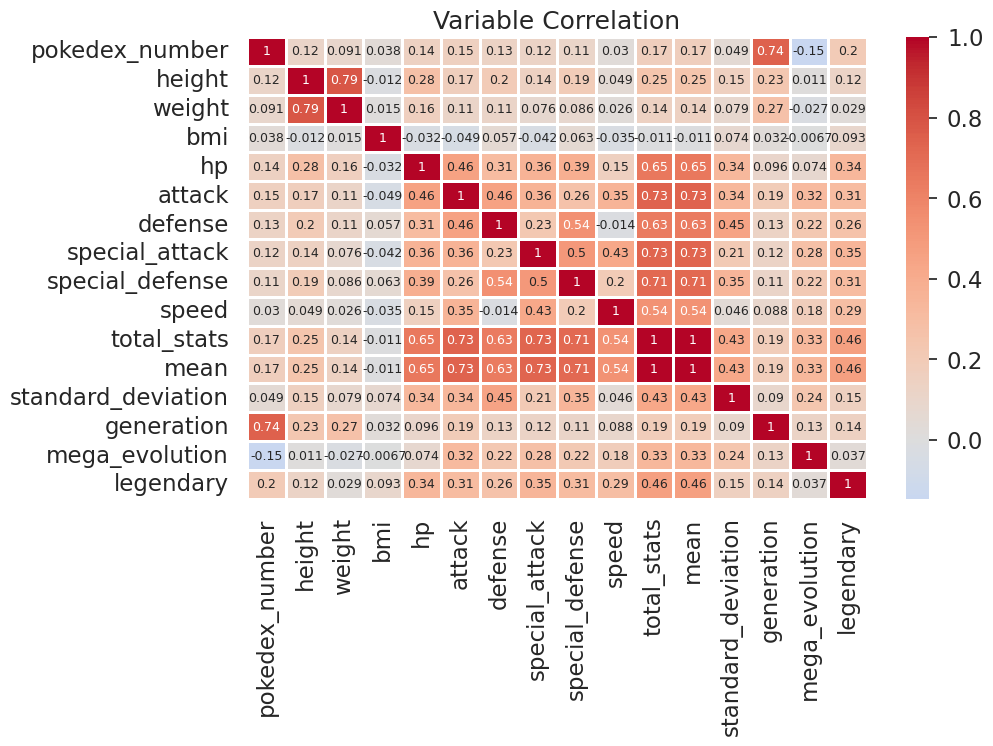

In [104]:
#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Plotting all variables against other variables to see if relation exists between them. Basically it tells the same thing as correlation matrix but in a graphical way.

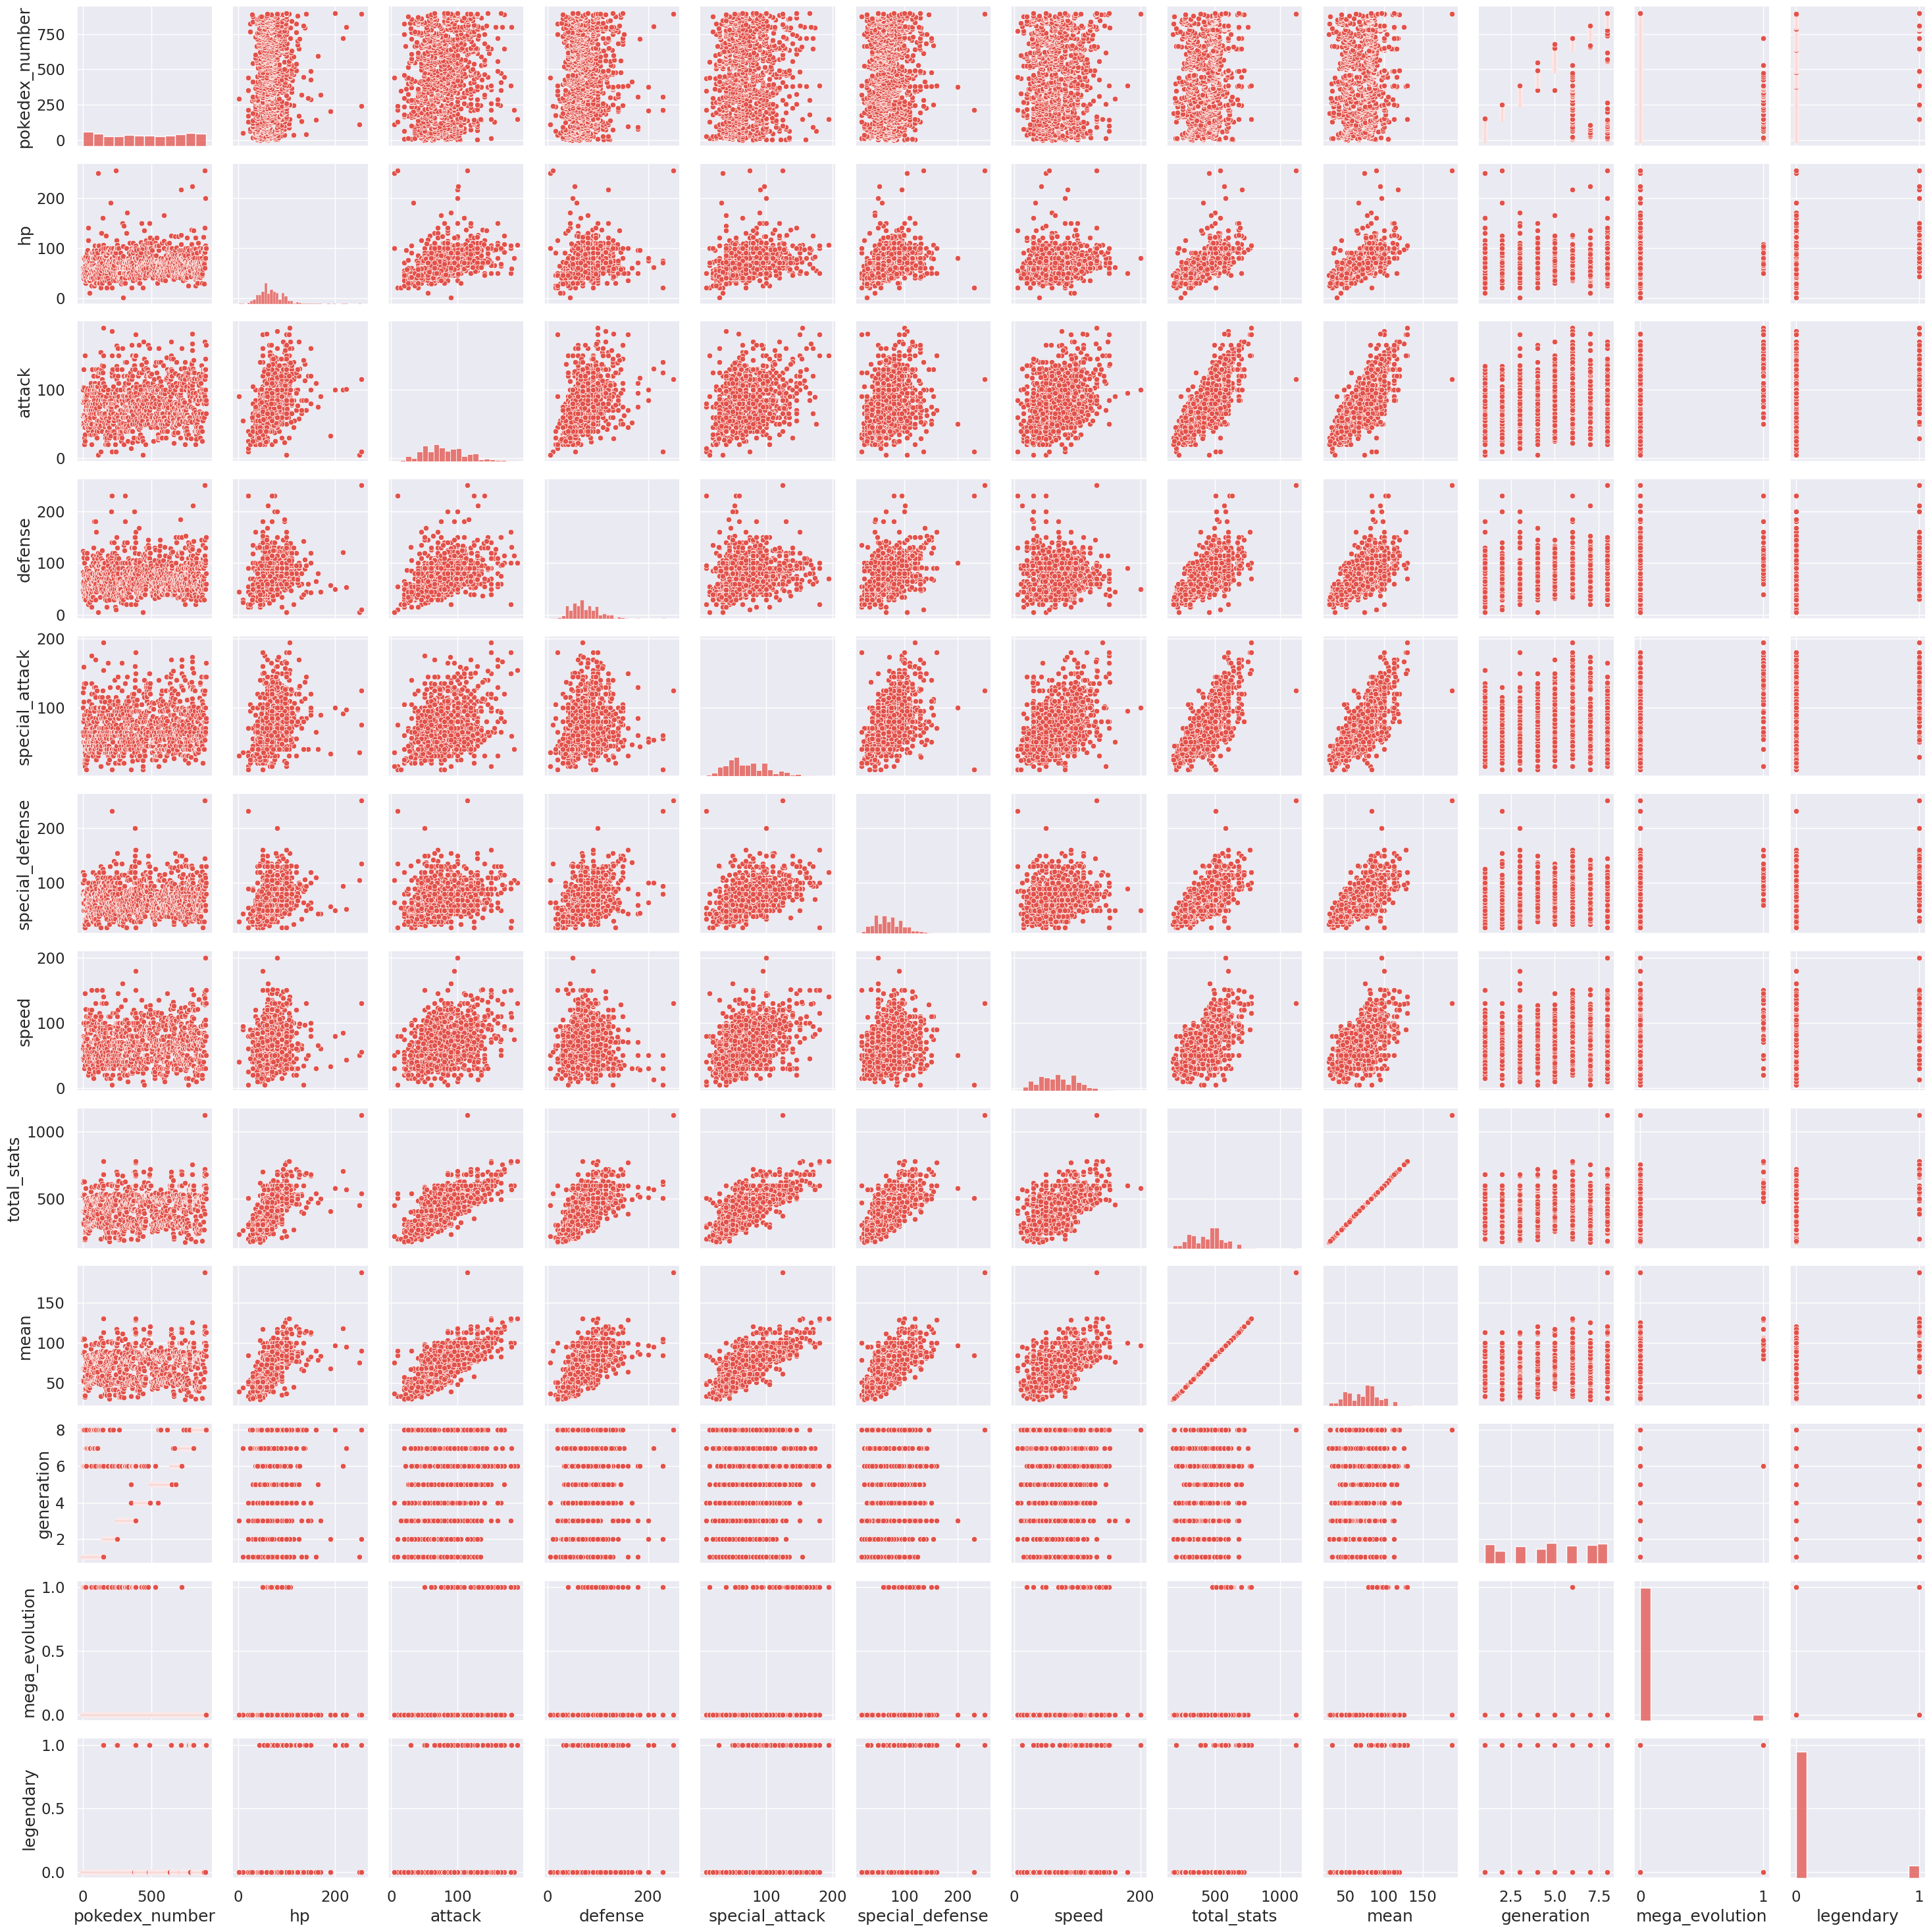

In [105]:
sns.pairplot(dfpd_modified)

When all independent variables were plotted against 'price' variable it is observed that for'Landsize' and 'BuildingArea' roughly a linear line is obtained. So it can be concluded from this plot that variables Landsize and BuildingArea have linear relation with Price

Checking if the Varibles we selected are good enough.

In [106]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = dfpd_modified[['hp', 'attack', 'defense', 'mean', 'special_attack', 'special_defense', 'total_stats']]
y = dfpd_modified['speed']

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature '{X.columns[indices[f]]}' ({feature_importances[indices[f]]})")


Feature ranking:
1. Feature 'total_stats' (0.235892808978238)
2. Feature 'defense' (0.21900608283985273)
3. Feature 'mean' (0.202891299634372)
4. Feature 'hp' (0.1439628012833078)
5. Feature 'special_attack' (0.07881340964247381)
6. Feature 'special_defense' (0.06934176565791662)
7. Feature 'attack' (0.050091831963839074)


As we can see, Through ranking. The varibles for predicitng Speed, BMI....Special Defense, These are good for the model. We dont need to drop or manupulate further.


Lets start with the H2O and create model using the dfpd dataframe containing our feature selected variables.
  

In [107]:
# Descriptive statistics
description = dfpdh2o_modified.describe()
print(description)

Rows:1118
Cols:12

pokedex_number      hp                 attack              defense             special_attack      special_defense    speed               total_stats         mean               generation         mega_evolution    legendary
-------  ------------------  -----------------  ------------------  ------------------  ------------------  -----------------  ------------------  ------------------  -----------------  -----------------  ----------------  -----------
type     int                 int                int                 int                 int                 int                int                 int                 real               int                enum              enum
mins     1.0                 1.0                5.0                 5.0                 10.0                20.0               5.0                 175.0               29.17              1.0
mean     446.9230769230766   70.00805008944548  80.69677996422188   74.77459749552771   73.24955277280853   72.58139534883732  69.47942754919508   440.78980322003514  73.46479427549211  4.650268336314845
maxs     898.0               255.0              190.0               250.0               194.0               250.0              200.0               1125.0              187.5              8.0
sigma    270.91558904444963  26.65642213681824  32.044482964439496  30.946356662157825  32.446931740736154  27.76516326223819  30.036549308966922  120.0531798148955   20.00897746817681  2.315773424327012
zeros    0                   0                  0                   0                   0                   0                  0                   0                   0                  0
missing  0                   0                  0                   0                   0                   0                  0                   0                   0                  0                  0                 0
0        1.0                 45.0               49.0                49.0                65.0                65.0               45.0                318.0               53.0               1.0                False             False
1        2.0                 60.0               62.0                63.0                80.0                80.0               60.0                405.0               67.5               1.0                False             False
2        3.0                 80.0               100.0               123.0               122.0               120.0              80.0                625.0               104.17             6.0                True              False
3        3.0                 80.0               82.0                83.0                100.0               100.0              80.0                525.0               87.5               1.0                False             False
4        3.0                 80.0               82.0                83.0                100.0               100.0              80.0                525.0               87.5               8.0                False             False
5        4.0                 39.0               52.0                43.0                60.0                50.0               65.0                309.0               51.5               1.0                False             False
6        5.0                 58.0               64.0                58.0                80.0                65.0               80.0                405.0               67.5               1.0                False             False
7        6.0                 78.0               84.0                78.0                109.0               85.0               100.0               534.0               89.0               1.0                False             False
8        6.0                 78.0               84.0                78.0                109.0               85.0               100.0               534.0               89.0               8.0                False             False
9        6.0                 78.0               130

None


Here, we can see that our h2o dataframe is updated with the changes and now we can proceed further with creating model.

In [108]:

import h2o

# Initialize H2O cluster
h2o.init()

# Define the percentages for train and validation sets
pct_train = 0.70
pct_val = 0.15

# Split the data into train, validation, and test sets

dfpdh2o_modified_train, dfpdh2o_modified_val, dfpdh2o_modified_test = dfpdh2o_modified.split_frame(
    ratios=[pct_train, pct_val], seed=1234)

# Print the number of rows in each set
print("Training set:", dfpdh2o_modified_train)
print("Validation set:", dfpdh2o_modified_val)
print("Test set:", dfpdh2o_modified_test)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         6 mins 17 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    1 month and 27 days
H2O_cluster_name:           H2O_from_python_unknownUser_ci791v
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.144 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Training set:   pokedex_number    hp    attack    defense    special_attack    special_defense    speed    total_stats    mean    generation  mega_evolution    legendary
               2    60        62         63                80                 80       60            405   67.5              1  False             False
               3    80       100        123               122                120       80            625  104.17             6  True              False
               3    80        82         83               100                100       80            525   87.5              8  False             False
               4    39        52         43                60                 50       65            309   51.5              1  False             False
               5    58        64         58                80                 65       80            405   67.5              1  False             False
               6    78        84         78               109         

In [109]:
X1=dfpdh2o_modified.columns
print(X1)

['pokedex_number', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed', 'total_stats', 'mean', 'generation', 'mega_evolution', 'legendary']


In [110]:
#Seperate Dependent variable from Independent variable
y1_numeric ='speed'
X1.remove(y1_numeric)
print(X1)


['pokedex_number', 'hp', 'attack', 'defense', 'special_attack', 'special_defense', 'total_stats', 'mean', 'generation', 'mega_evolution', 'legendary']


Running the model


We are retraining the model now, using the modified version of the dataframe that we feature selected.

In [111]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [112]:
aml1.train(x=X1,y=y1_numeric,training_frame=dfpdh2o_modified_train, validation_frame=dfpdh2o_modified_val)

AutoML progress: |
06:12:54.541: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_2_20240217_61254


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  1/3
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  0/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.2240205735343749
RMSE: 0.47330811691156843
MAE: 0.3628051893921603
RMSLE: 0.013935186336713482
Mean Residual Deviance: 0.2240205735343749
R^2: 0.9997490003222672
Null degrees of freedom: 794
Residual degrees of freedom: 793
Null deviance: 709548.1459119489
Residual deviance: 178.09635595982806
AIC: 1072.7784465542009

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.2517305696361278
RMSE: 0.5017275850858988
MAE: 0.365791014042845
RMSLE: 0.009839443755233894
Mean Residual Deviance: 0.2517305696361278
R^2: 0.9997433630835395
Null degrees of freedom: 153
Residual degrees of freedom: 152
Null deviance: 151212.23211265373
Residual deviance: 38.76650772396368
AIC: 230.60609476845238

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.3358691448916568
RMSE: 0.579542185601408
MAE: 0.4367724687700375
RMSLE: 0.016061057391887023
Mean Residual Deviance: 0.3358691448916568
R^2: 0.9996236816744187
Null degrees of freedom: 794
Residual degrees of freedom: 793
Null deviance: 713762.3296918613
Residual deviance: 267.0159701888672
AIC: 1394.7405203373287

Cross-Validation Metrics Summary: 
                        mean       sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.436984   0.0380895    0.43713       0.480071      0.4352        0.376988      0.455532
mean_residual_deviance  0.335088   0.0606392    0.331853      0.426115      0.319407      0.256806      0.341258
mse                     0.335088   0.0606392    0.331853      0.426115      0.319407      0.256806      0.341258
null_deviance           142752     9885.45      146677        134834        132887        141955        157409
r2                      0.999618   8.87247e-05  0.999623      0.999471      0.999633      0.999712      0.999649
residual_deviance       53.3831    10.6683      54.7557       69.8829       48.5498       40.8322       52.895
rmse                    0.576987   0.0521247    0.576067      0.652775      0.565161      0.506761      0.584173
rmsle                   0.0150049  0.00647553   0.0135879     0.0141703     0.0117294     0.00943096    0.0261057

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [113]:
print(aml1.leaderboard)

model_id                                                     rmse         mse       mae        rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_2_20240217_61254   0.579542    0.335869  0.436772    0.0160611                  0.335869
StackedEnsemble_BestOfFamily_3_AutoML_2_20240217_61254   0.579598    0.335934  0.437449    0.0158071                  0.335934
StackedEnsemble_AllModels_2_AutoML_2_20240217_61254      0.580571    0.337063  0.43745     0.0157524                  0.337063
StackedEnsemble_BestOfFamily_4_AutoML_2_20240217_61254   0.581419    0.338048  0.439089    0.0156687                  0.338048
StackedEnsemble_BestOfFamily_2_AutoML_2_20240217_61254   0.581802    0.338493  0.43863     0.0160915                  0.338493
StackedEnsemble_AllModels_1_AutoML_2_20240217_61254      0.582108    0.33885   0.439317    0.0162575                  0.33885
GLM_1_AutoML_2_20240217_61254                            0.948042    0.898784  0.755011    0.0261925            

In [114]:
# Initialize variables
model_index = 0
glm_index = 0
models_dict = {}

# Assuming aml is your AutoML object
aml1_leaderboard_dfpdh2o_modified = aml1.leaderboard.as_data_frame()

# Iterate through the leaderboard
for m in aml1_leaderboard_dfpdh2o_modified['model_id']:
    # Assign index for StackedEnsemble models
    if 'StackedEnsemble' in m:
        models_dict[m] = model_index
        model_index += 1
    # Assign index for GLM model
    elif 'GLM' in m:  # Use elif to ensure GLM is processed separately
        models_dict[m] = glm_index
        glm_index += 1  # Increment glm_index here

# Output the dictionary with model IDs and their assigned index
for model_id, index in models_dict.items():
    print(f"{model_id}: {index}")


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
StackedEnsemble_BestOfFamily_1_AutoML_2_20240217_61254: 0
StackedEnsemble_BestOfFamily_3_AutoML_2_20240217_61254: 1
StackedEnsemble_AllModels_2_AutoML_2_20240217_61254: 2
StackedEnsemble_BestOfFamily_4_AutoML_2_20240217_61254: 3
StackedEnsemble_BestOfFamily_2_AutoML_2_20240217_61254: 4
StackedEnsemble_AllModels_1_AutoML_2_20240217_61254: 5
GLM_1_AutoML_2_20240217_61254: 0
StackedEnsemble_AllModels_3_AutoML_2_20240217_61254: 6


Finding the best model

In [115]:
# Find the model with the lowest index (assuming lower index implies better performance)
best_model1_index = min(models_dict.values())

# Search for the model ID corresponding to the lowest index
best_model_id = None
for model_id, index in models_dict.items():
    if index == best_model1_index:
        best_model_id = model_id
        break

# Output the ID of the best model
print("Best Model ID:", best_model_id)


Best Model ID: StackedEnsemble_BestOfFamily_1_AutoML_2_20240217_61254


now to find the best algorithm

In [116]:
# Initialize a list to store the algorithms used in the models
algorithms_used = []

# Iterate through the model IDs in models_dict
for model_id in models_dict.keys():
    # Extract the algorithm from the model ID
    algorithm = model_id.split("_")[0]  # Assumes algorithm name is at the beginning of the model ID
    # Add the algorithm to the list if it's not already present
    if algorithm not in algorithms_used:
        algorithms_used.append(algorithm)

# Output the list of algorithms used
print("Algorithms used:", algorithms_used)


Algorithms used: ['StackedEnsemble', 'GLM']


In [117]:
best_model = h2o.get_model(best_model_id)
print("Best Model Type:", best_model.algo)

Best Model Type: stackedensemble


Here, we find out the best model we have is stackedensemble, but just to be sure and confirm our analysis, we will further compare the rmse.

In [127]:
best_rmse = [float('inf')] * 3  # Initialize with positive infinity
best_model_id = [None] * 3

# Models to search for
target_models = ['StackedEnsemble', 'GLM']

# Iterate through the leaderboard
for model_id, rmse in zip(aml1_leaderboard_dfpdh2o_modified['model_id'], aml1_leaderboard_dfpdh2o_modified['rmse']):
    # Check if the model is one of the target models
    if any(model_type in model_id for model_type in target_models):
        # Update best_rmse and best_model_id if the current model has lower RMSE
        for i, val in enumerate(best_rmse):
            if rmse < val:
                best_rmse.insert(i, rmse)
                best_model_id.insert(i, model_id)
                best_rmse = best_rmse[:3]  # Keep only top 3 values
                best_model_id = best_model_id[:3]  # Keep only top 3 models
                break

# Print the top 3 models with their corresponding RMSE values
print("Top 3 Models with Lowest RMSE:")
for rmse, model_id in zip(best_rmse, best_model_id):
    print("Model ID:", model_id, "- RMSE:", rmse)

# Select the best model among the top 3 based on the lowest RMSE
best_model_id = best_model_id[0]  # The first model in the list has the lowest RMSE

print("\nBest Model to Pick:", best_model_id)


Top 3 Models with Lowest RMSE:
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_2_20240217_61254 - RMSE: 0.579542185601408
Model ID: StackedEnsemble_BestOfFamily_3_AutoML_2_20240217_61254 - RMSE: 0.5795982918723144
Model ID: StackedEnsemble_AllModels_2_AutoML_2_20240217_61254 - RMSE: 0.580571431319156

Best Model to Pick: StackedEnsemble_BestOfFamily_1_AutoML_2_20240217_61254


It seems like you have a Stacked Ensemble model with a GLM (Generalized Linear Model) as the metalearner.

To analyze variable importance in this case, you can't directly use the varimp_plot() function because Stacked Ensemble models do not inherently provide variable importances like some other algorithms such as GBM or Random Forests.

However, you can still gain insights into variable importance indirectly:

Check Base Models: Look into the base models used in the Stacked Ensemble. Although not explicitly stated here, often these base models can provide insight into feature importance.
Analyze Coefficients: Since your metalearner is a GLM, you have coefficients associated with each feature. Positive coefficients indicate features positively associated with the target, and negative coefficients indicate negative association.
Feature Selection: Consider using techniques like recursive feature elimination or permutation importance to understand feature importance further.
If you have access to the base models or their summaries, you can inspect those directly for feature importance information.

In [119]:
# Get the stacked ensemble model from aml1
stacked_ensemble_model_aml1 = aml1.leader

# Get base models from aml1's stacked ensemble
base_models_aml1 = stacked_ensemble_model_aml1.base_models

# Print the base models from aml1
print("Base models from aml1:")
print(base_models_aml1)


Base models from aml1:
['GLM_1_AutoML_2_20240217_61254', 'XGBoost_1_AutoML_2_20240217_61254', 'GBM_1_AutoML_2_20240217_61254']


Now I need to visualize this model and compare

In [138]:
import h2o
from h2o.automl import get_leaderboard

lb = aml1.leaderboard
lb.head(rows=lb.nrows)


model_id                                                     rmse          mse        mae        rmsle    mean_residual_deviance
------------------------------------------------------  ---------  -----------  ---------  -----------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_2_20240217_61254   0.579542     0.335869   0.436772    0.0160611                  0.335869
StackedEnsemble_BestOfFamily_3_AutoML_2_20240217_61254   0.579598     0.335934   0.437449    0.0158071                  0.335934
StackedEnsemble_AllModels_2_AutoML_2_20240217_61254      0.580571     0.337063   0.43745     0.0157524                  0.337063
StackedEnsemble_BestOfFamily_4_AutoML_2_20240217_61254   0.581419     0.338048   0.439089    0.0156687                  0.338048
StackedEnsemble_BestOfFamily_2_AutoML_2_20240217_61254   0.581802     0.338493   0.43863     0.0160915                  0.338493
StackedEnsemble_AllModels_1_AutoML_2_20240217_61254      0.582108     0.33885    0.439317    0.0162575                  0.33885
GLM_1_AutoML_2_20240217_61254                            0.948042     0.898784   0.755011    0.0261925                  0.898784
StackedEnsemble_AllModels_3_AutoML_2_20240217_61254      0.964807     0.930853   0.756002    0.0265798                  0.930853
DeepLearning_1_AutoML_2_20240217_61254                   5.22292     27.2789     3.53457   nan                         27.2789
XGBoost_grid_1_AutoML_2_20240217_61254_model_16         12.7859     163.48       9.02331     0.255759                 163.48
XGBoost_grid_1_AutoML_2_20240217_61254_model_19         13.1898     173.971      9.3878      0.259636                 173.971
GBM_grid_1_AutoML_2_20240217_61254_model_25             13.5114     182.559      9.70889     0.269111                 182.559
XGBoost_grid_1_AutoML_2_20240217_61254_model_15         13.6457     186.204      9.72971     0.270093                 186.204
XGBoost_grid_1_AutoML_2_20240217_61254_model_9          13.7143     188.082      9.78153     0.26682                  188.082
GBM_grid_1_AutoML_2_20240217_61254_model_5              13.7321     188.572      9.77992     0.269163                 188.572
XGBoost_grid_1_AutoML_2_20240217_61254_model_7          13.8273     191.195      9.97409     0.268806                 191.195
XGBoost_grid_1_AutoML_2_20240217_61254_model_11         13.8866     192.837      9.79977     0.269357                 192.837
XGBoost_3_AutoML_2_20240217_61254                       14.0767     198.154     10.0965    nan                        198.154
GBM_grid_1_AutoML_2_20240217_61254_model_26             14.0797     198.237     10.1074      0.272521                 198.237
GBM_3_AutoML_2_20240217_61254                           14.1341     199.773     10.1387      0.27126                  199.773
XGBoost_grid_1_AutoML_2_20240217_61254_model_18         14.2346     202.623     10.1081      0.27676                  202.623
GBM_grid_1_AutoML_2_20240217_61254_model_23             14.2432     202.867     10.0313      0.274707                 202.867
GBM_4_AutoML_2_20240217_61254                           14.2763     203.814     10.3606      0.275654                 203.814
GBM_2_AutoML_2_20240217_61254                           14.3605     206.223     10.2381      0.275939                 206.223
XGBoost_1_AutoML_2_20240217_61254                       14.4404     208.525     10.1893      0.274426                 208.525
XGBoost_grid_1_AutoML_2_20240217_61254_model_6          14.6277     213.969     10.4467      0.281537                 213.969
XGBoost_grid_1_AutoML_2_20240217_61254_model_14         14.6321     214.098     10.2104      0.28587                  214.098
XGBoost_2_AutoML_2_20240217_61254                       14.6351     214.187     10.6605      0.277766                 214.187
GBM_grid_1_AutoML_2_20240217_61254_model_3              14.7752     218.307     10.912       0.288305                 218.307
XGBoost_grid_1_AutoML_2_20240217_61254_model_2          15.0012  

In [139]:
best_model = aml1.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_2_20240217_61254


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  1/3
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  0/1
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.2240205735343749
RMSE: 0.47330811691156843
MAE: 0.3628051893921603
RMSLE: 0.013935186336713482
Mean Residual Deviance: 0.2240205735343749
R^2: 0.9997490003222672
Null degrees of freedom: 794
Residual degrees of freedom: 793
Null devianc

How did AutoML pick this model?
The difference between the first 3 models in the leaderboard is that the first two are ensemble models that combine multiple models to make predictions, while the third is a single XGBoost model. The Stacked Ensemble models use a combination of models to make predictions and generally result in better performance compared to a single model.

The model that was probably chosen as the best model is the "StackedEnsemble_AllModels_1_AutoML_1_20230214_162143" model because it has the lowest RMSE, which is a commonly used measure of the prediction error in regression problems. However, it is important to evaluate the model based on other metrics and use cross-validation to get a more accurate estimate of the model's performance on unseen data.

Evaluating the best model on a holdout test set using the same evaluation metrics shown above.

In [141]:
best_model.model_performance(dfpdh2o_modified_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.29577260318379905
RMSE: 0.5438497983669747
MAE: 0.4038530254087
RMSLE: 0.010156634146626585
Mean Residual Deviance: 0.29577260318379905
R^2: 0.9996594163363852
Null degrees of freedom: 168
Residual degrees of freedom: 167
Null deviance: 146992.1513721767
Residual deviance: 49.98556993806204
AIC: 279.73144866976986

Let's examine its results.
MSE (Mean Squared Error): In this case, the MSE is 24.96, which means that the average squared difference between the predicted and actual delivery times is about 24.96.

RMSE (Root Mean Squared Error):is the square root of MSE and is used to provide a more interpretable measure of error in the same units as the target variable. The RMSE in this case is 4.996, which means that on average the predictions are off by about 5 minutes.

MAE (Mean Absolute Error): In this case, the MAE is 3.984, which means that on average the predictions are off by about minutes.

RMSLE (Root Mean Squared Log Error): measures the ratio between the predicted and actual values, where the values are first log-transformed. In this case, the RMSLE is 0.203, which means that the predicted values are off by about 20% on average.

Mean Residual Deviance: measures the variance of the residuals, which is the difference between the predicted and actual values. A lower value indicates a better fit. In this case, the mean residual deviance is 24.96 minutes.

R^2 (Coefficient of Determination): A value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variance. In this case, the R^2 is 0.705, which means that the model explains about 70% of the variance in the delivery times.

Null degrees of freedom and residual degrees of freedom: are the degrees of freedom for the null model (a model with no predictors) and the residual model, respectively. In this case, there are 486 null degrees of freedom and 471 residual degrees of freedom.

Null deviance and residual deviance: measure the deviance of the null model and residual model, respectively. A lower value indicates a better fit. In this case, the null deviance is 41297.35 and the residual deviance is 12157.04.

AIC (Akaike Information Criterion): is a measure of the relative quality of the model, taking into account the number of parameters. A lower value indicates a better fit. In this case, the AIC is 2982.92.

Explainability

H2O AutoML also provides insights into model’s global explainability such as variable importance, partial dependence plot, SHAP values and model correlation with just one line of code

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

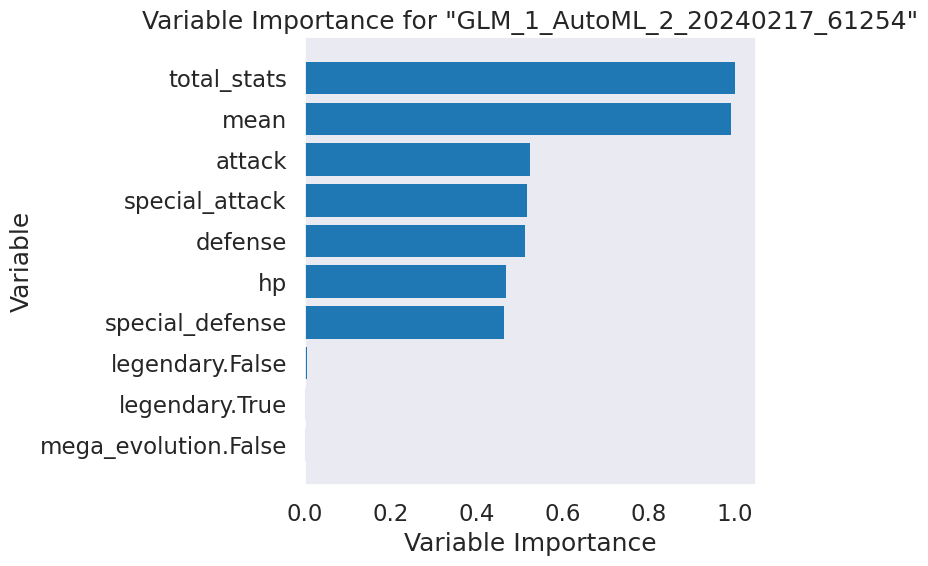

In [144]:
explain_model = aml1.explain(frame = dfpdh2o_modified_test, figsize = (8,6),include_explanations=['varimp'])


Interpretting Feature Importance:

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

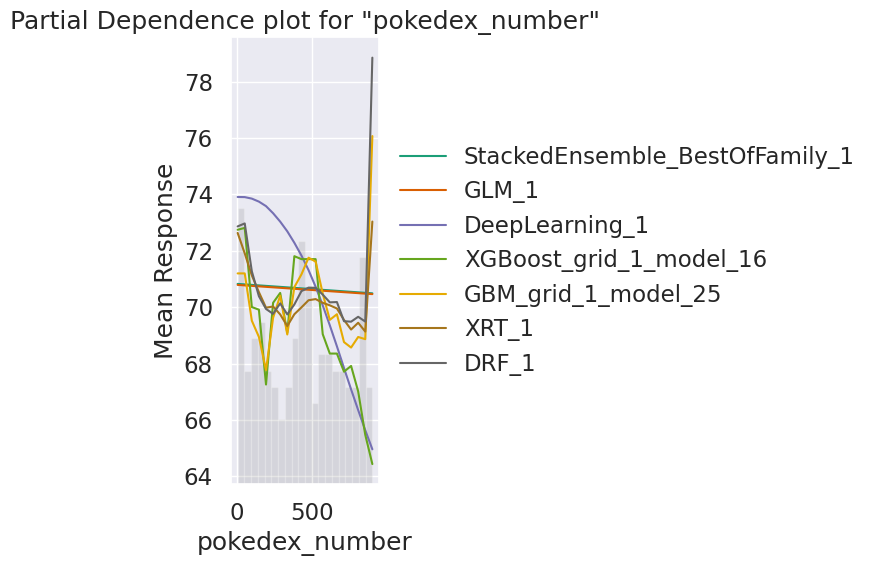

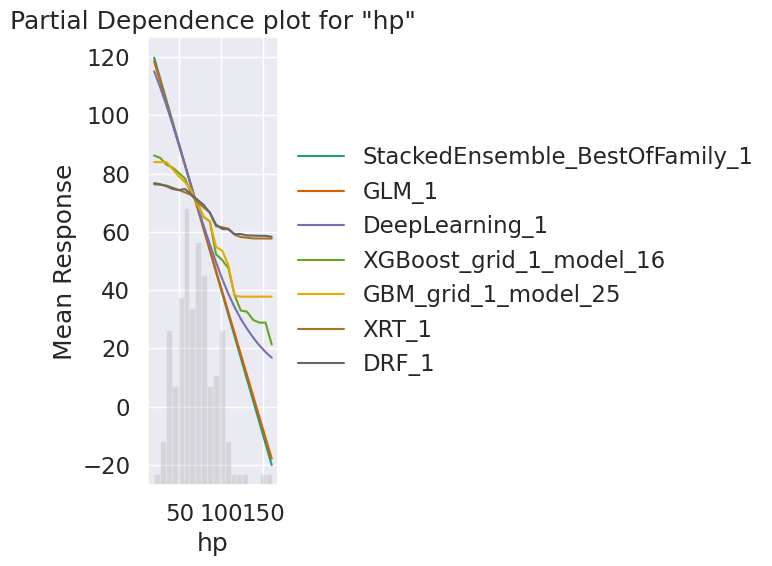

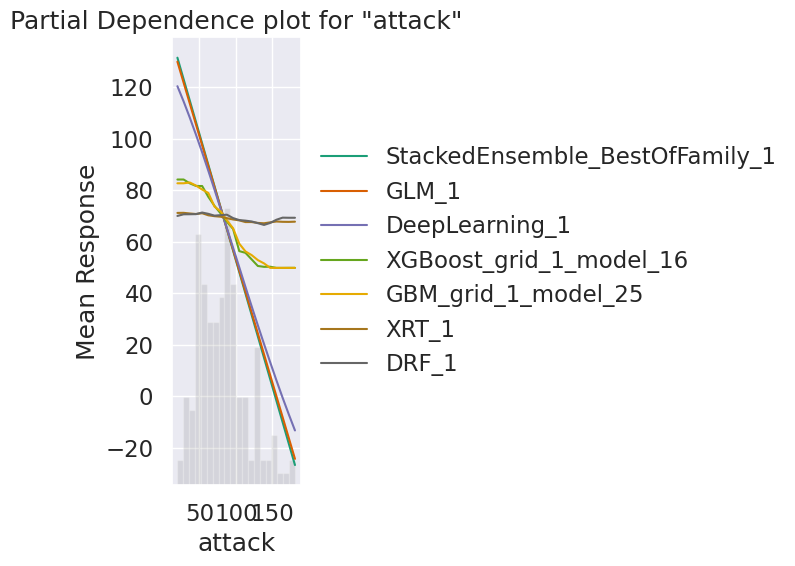

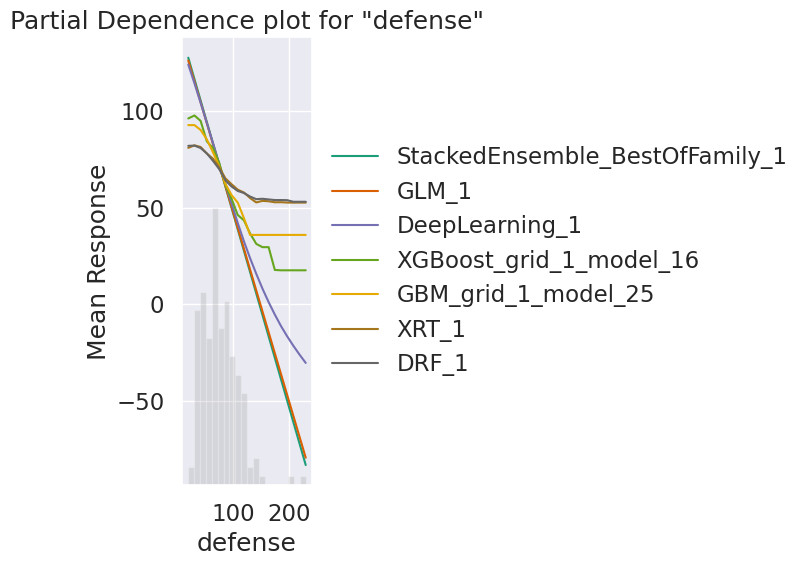

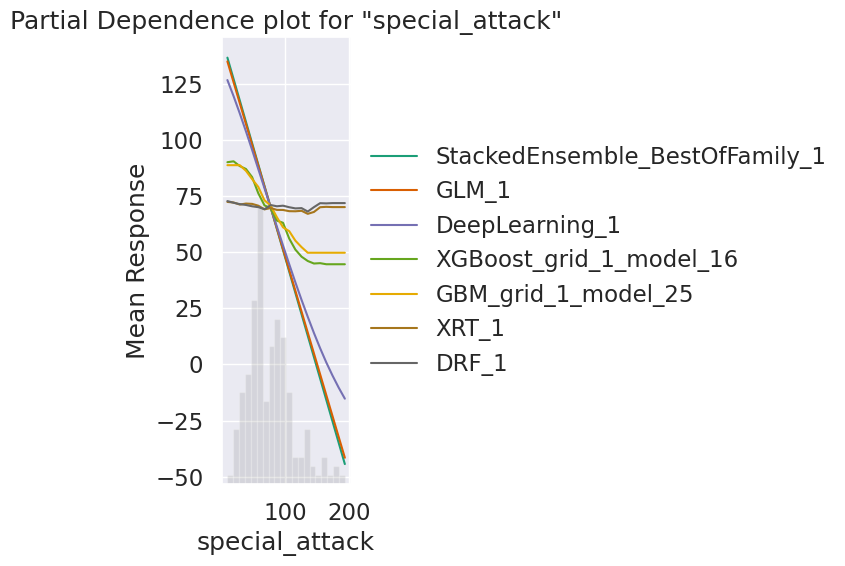

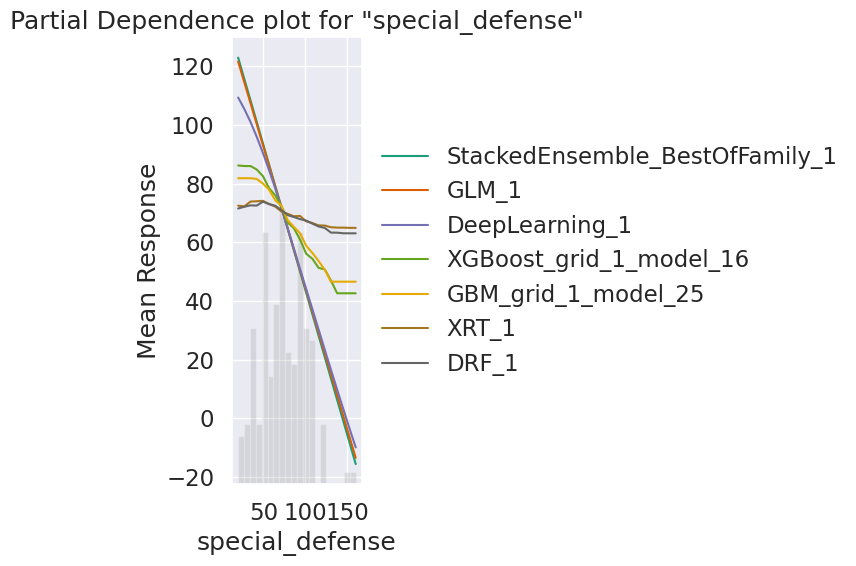

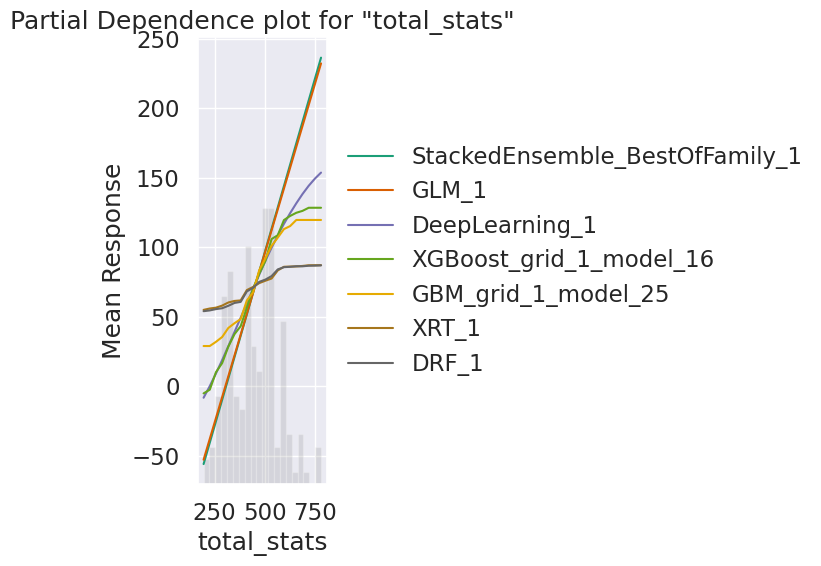

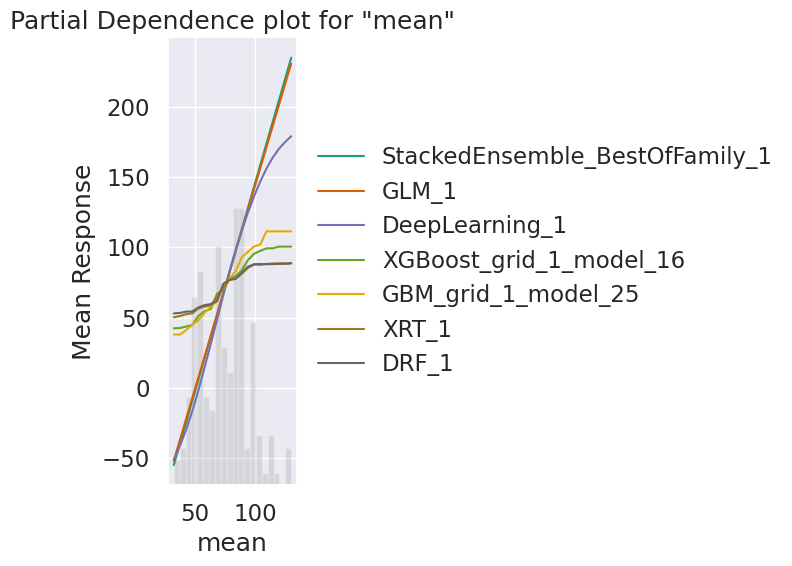

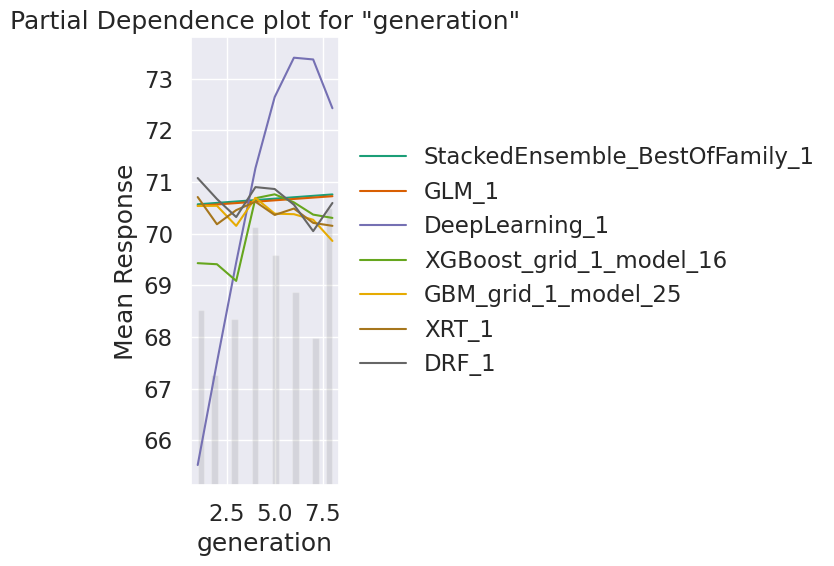

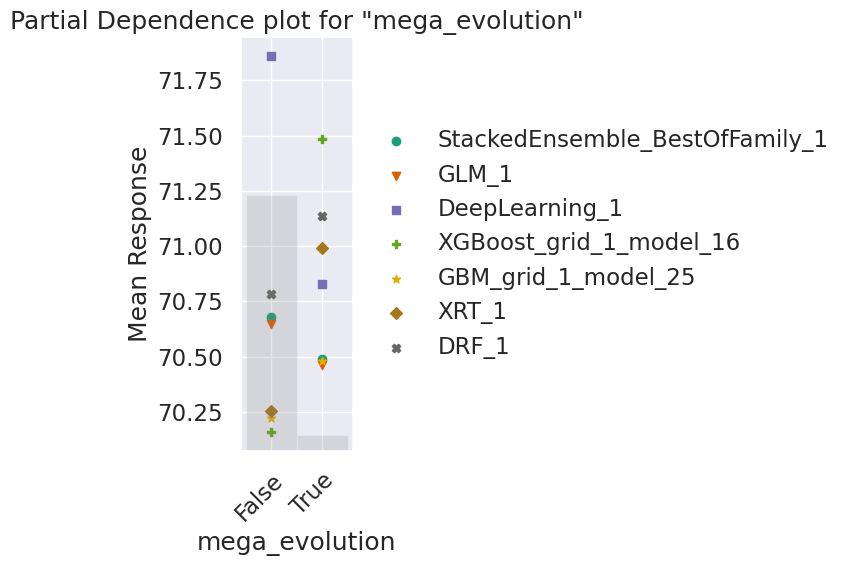

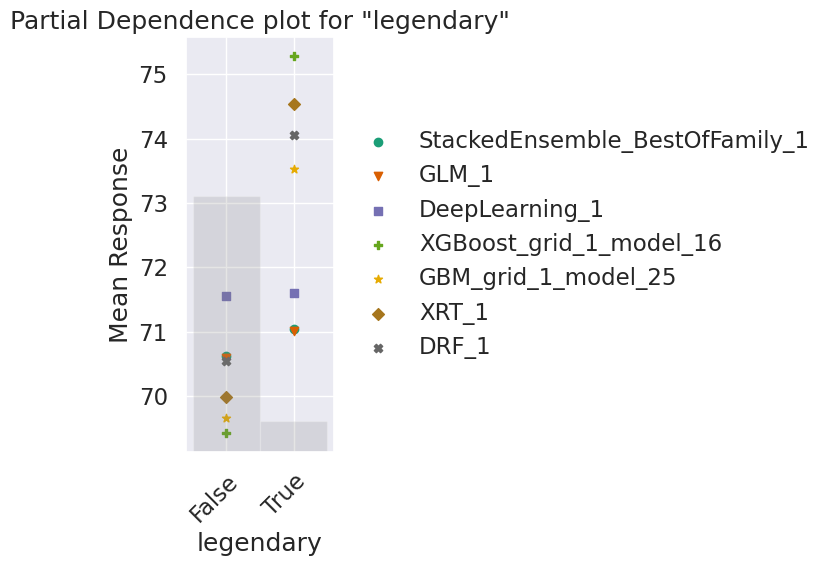

In [145]:
explain_model = aml1.explain(frame = dfpdh2o_modified_test, figsize = (4,6),include_explanations=['pdp'])


Local Explainability


In addition, it also provides local explainability for individual records. We can input a H2OFrame into the frame argument and indicate which row we would like explained using the row_index argument. In this case we are explaining the results for row 15 of the test frame.


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

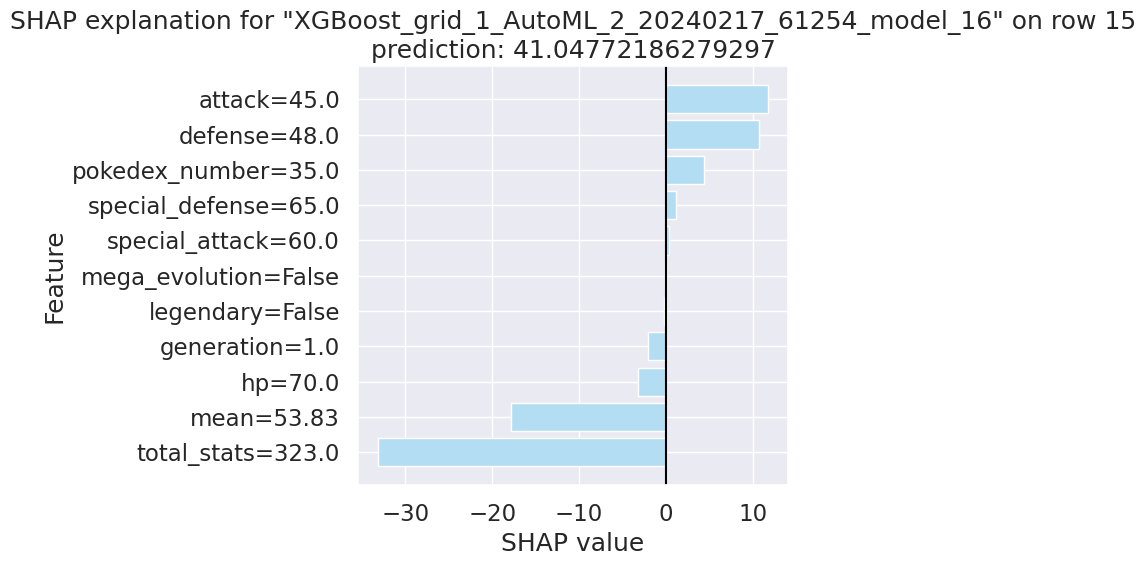

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

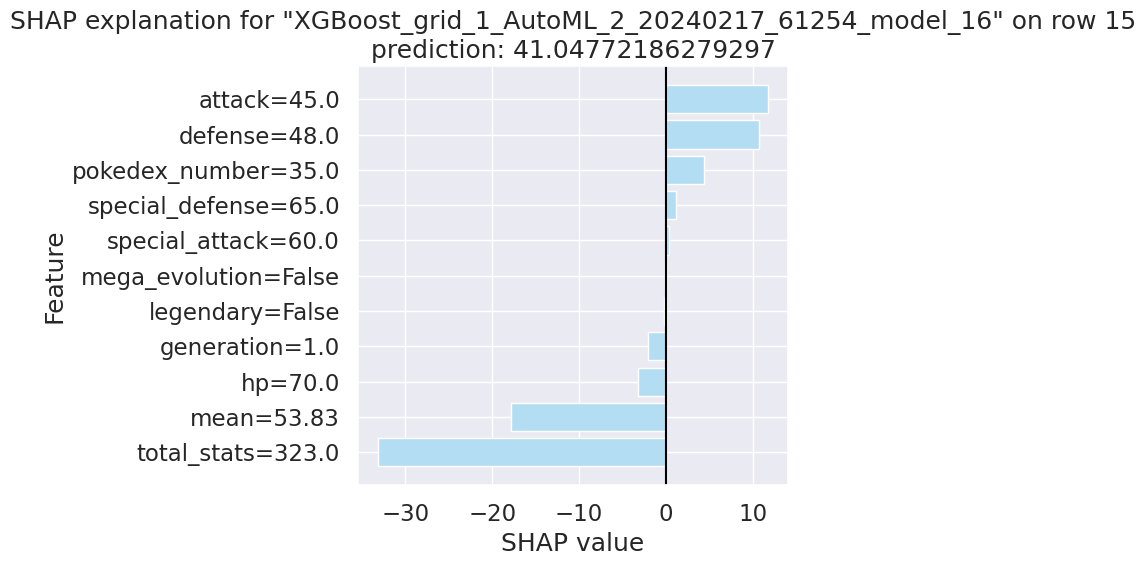

In [148]:
aml1.explain_row(frame = dfpdh2o_modified_test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")